Link to Data Source : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Câu 1: Viết chương trình cài đặt phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy của một thông số thống kê của một biến (đặc trưng) nào đó của dataset với:\
• Biến (đặc trưng): do SV chọn từ dataset.\
• Thông số thống kê: giá trị trung bình (GTTB).\
• Viết hàm có:\
    • Input parameters: n (sample size), M (number of bootstrap samplings), x (confidence interval in %).\
    • Return values: phân bố lấy mẫu (bằng histogram) và dải tin cậy của GTTB của đặc trưng đã chọn.

In [3]:
#Các thư viện cần thiết
import numpy as np
import pandas as pd

#Các thư viện dùng để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:

# Đọc file dataset .csv vào data frame
df_heart_disease = pd.read_csv('../bootstrap-sampling-method/heart_2020_cleaned.csv', delimiter=',')
df_heart_disease.shape #kích thước của data frame


(319795, 18)

Hàm sử dụng phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy:\
Đầu vào: N, M, x.\
Trong đó: \
    + N: số quan sát có trong 1 mẫu (kích thước của 1 mẫu).\
    + M: số lượng mẫu Bootstap.\
    + x: khoảng tin cậy (%).

In [14]:
#Hàm phân bố lấy mẫu sử dụng phương pháp bootstrap
def bootstrapping(N, M, x):
    #Khởi tạo các biến
    upper_bound = 0
    lower_bound = 0
    mean_bootstrap = []

    for _ in range(M):
        #Tạo mẫu với kích thước là N, các giá trị có thể lặp
        new_df = df_heart_disease.sample(n= N, replace=True)

        #Lưu giá trị Mean tìm được của mẫu đó
        mean_bootstrap.append(float(new_df.mean(axis=0)))

    dict = {'Mean BMI of Heart Disease': mean_bootstrap}
    mean_bootstrap = pd.DataFrame(dict)

    #Sắp xếp lại các giá trị trong mean_bootstrap theo thứ tự tăng dần
    sorted_df = mean_bootstrap.sort_values(by='Mean BMI of Heart Disease', ascending=True)
    
    lower_bound = sorted_df.iloc[round(M*x)] #Tính vị trí giới hạn dưới
    upper_bound = sorted_df.iloc[round(M*(1-x))] #Tính vị trí giới hạn trên
    mean_line = sorted_df.mean() #Tính vị trí của mean

    return mean_bootstrap, lower_bound, upper_bound, mean_line


CƠ SỞ ĐỂ TÍNH DẢI TIN CẬY:\
Cú pháp hàm SMALL trong file excel Bootstrap_method\
    =SMALL(array, k)\
    Trong đó:\
    array: Là phạm vi vùng dữ liệu dạng số chứa giá trị bạn cần xác định giá trị nhỏ thứ k.\
    k: Là thứ hạng của giá trị (tính từ giá trị nhỏ nhất) trong vùng dữ liệu cần trả về.\
\
ÁP DỤNG:
- array sẽ là tập sorted_df. 
* Đối với cách tìm vị trí giới hạn dưới: 
    - k = M * x.
* Đối với cách tìm vị trí giới hạn trên: 
    - k = M * (1 - x).

Xuất đồ thị Histogram - phân bố lấy mẫu với dải tin cậy của GTTB của đặc trưng

Giới hạn dưới: 28.58
Giới hạn trên: 29.82
Mean: 29.19


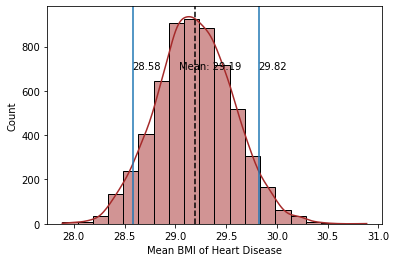

In [21]:
#Lấy 900 hàng đầu tiên theo đặc trưng BMI có chứa đặc trưng HeartDisease giá trị là 'Yes'
df_heart_disease = (df_heart_disease['BMI'][df_heart_disease['HeartDisease'] == "Yes"]).head(900)

#Gọi hàm bootstrapping
mean_bootstrap, lower_bound, upper_bound, mean_line = bootstrapping(300,6000,0.05) # dataframe, n, M, x%

#Histogram
sns.histplot(mean_bootstrap['Mean BMI of Heart Disease'], kde=True ,color = 'brown', bins=20)

#Khoảng tin cậy
lower_bound = float("{:.2f}".format(float(lower_bound)))
upper_bound = float( "{:.2f}".format(float(upper_bound)))
mean_line = float( "{:.2f}".format(float(mean_line)))

print('Giới hạn dưới: ' + str(lower_bound))
print('Giới hạn trên: '  + str(upper_bound))
print('Mean: '  + str(mean_line))

plt.axvline(lower_bound, 0,20)
plt.axvline(upper_bound, 0,20)
plt.axvline(mean_line, 0,20, color = 'k', linestyle = '--')

plt.text(lower_bound, 700, str(lower_bound), fontsize=10)
plt.text(upper_bound, 700, str(upper_bound), fontsize=10)
plt.text(mean_line-0.15, 700, "Mean: " + str(mean_line), fontsize=10)
plt.show()

A kernel density estimate (KDE) là biểu đồ ước tính mật độ, là 1 phương pháp để trực quan hóa sự phân bố của các quan sát trong tập dữ liệu tương ứng với biểu đồ 